# Data Discovery

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Data Understanding

In [2]:
# Read raw file
data_raw = pd.read_csv('Data/2019-09-13istdaten.csv', sep=';', encoding='utf8', low_memory=False)

In [3]:
# Take a look at all columns and understand their meaning
data_raw.columns

Index(['BETRIEBSTAG', 'FAHRT_BEZEICHNER', 'BETREIBER_ID', 'BETREIBER_ABK',
       'BETREIBER_NAME', 'PRODUKT_ID', 'LINIEN_ID', 'LINIEN_TEXT', 'UMLAUF_ID',
       'VERKEHRSMITTEL_TEXT', 'ZUSATZFAHRT_TF', 'FAELLT_AUS_TF', 'BPUIC',
       'HALTESTELLEN_NAME', 'ANKUNFTSZEIT', 'AN_PROGNOSE',
       'AN_PROGNOSE_STATUS', 'ABFAHRTSZEIT', 'AB_PROGNOSE',
       'AB_PROGNOSE_STATUS', 'DURCHFAHRT_TF'],
      dtype='object')

In [4]:
data_all = data_raw
# Look at data integrity and size
data_all.count()

BETRIEBSTAG            1767703
FAHRT_BEZEICHNER       1767703
BETREIBER_ID           1767703
BETREIBER_ABK          1767703
BETREIBER_NAME         1767703
PRODUKT_ID             1745083
LINIEN_ID              1767703
LINIEN_TEXT            1767638
UMLAUF_ID              1008488
VERKEHRSMITTEL_TEXT    1246266
ZUSATZFAHRT_TF         1767703
FAELLT_AUS_TF          1767703
BPUIC                  1767703
HALTESTELLEN_NAME      1714678
ANKUNFTSZEIT           1662588
AN_PROGNOSE            1638041
AN_PROGNOSE_STATUS     1767703
ABFAHRTSZEIT           1664056
AB_PROGNOSE            1639386
AB_PROGNOSE_STATUS     1767703
DURCHFAHRT_TF          1767703
dtype: int64

In [5]:
# Produkt_ID seems to be containing information about the type of public transport
data_all['PRODUKT_ID'].value_counts()

Bus       1122562
Tram       244002
BUS        217098
Zug        156628
Metro        4394
Schiff        399
Name: PRODUKT_ID, dtype: int64

In [6]:
for column in data_raw.columns:
    print(data_all[column].value_counts())
    print(' \n ')

13.09.2019    1767703
Name: BETRIEBSTAG, dtype: int64
 
 
85:823:713027-06205-1    73
85:820:420962-18021-1    66
85:146:59380-04125-1     66
85:146:41160-04125-1     56
85:801:06819100823       54
                         ..
80:06____:17027:000       1
80:06____:17381:000       1
81:817000:5789:001        1
80:06____:17035:000       1
85:11:96570:004           1
Name: FAHRT_BEZEICHNER, Length: 105730, dtype: int64
 
 
85:881       205846
85:801       153929
85:849       133942
85:151       113734
85:3849      103796
              ...  
85:160           30
80:80____         9
80:L7____         1
87:87____         1
80:1080           1
Name: BETREIBER_ID, Length: 113, dtype: int64
 
 
TPG        205846
PAG        153929
VBZ        133942
TL         113734
VBZ Fpl    103796
            ...  
BRB            48
TN             36
BLS-brs        34
DFB            30
SNCF            1
Name: BETREIBER_ABK, Length: 110, dtype: int64
 
 
Transports Publics Genevois                      205846
Po

In [7]:
def plot_value_counts_pie_chart(df_col, title_upperpart):
    """
    function takes a column of a dataframe as input and makes a pie chart out of it,
    based on the value_counts function. title_upperpart is also provided to give the 
    plto a title
    """
    plt.figure()
    df_size = len(df_col)
    df_col.value_counts().plot(
        kind='pie',
        explode=explode,
        y=df_col.value_counts().values,
        legend=False,
        autopct='%1.1f%%',
        startangle=0,
        shadow=False,
        label='',
        title=title_upperpart + ', \n total: ' + str(df_size) +
        ' stops (13th September 2019)',
        figsize=(10, 10))

In [8]:
explode = (0, 0, 0, 0.05, 0.1, 1.5)

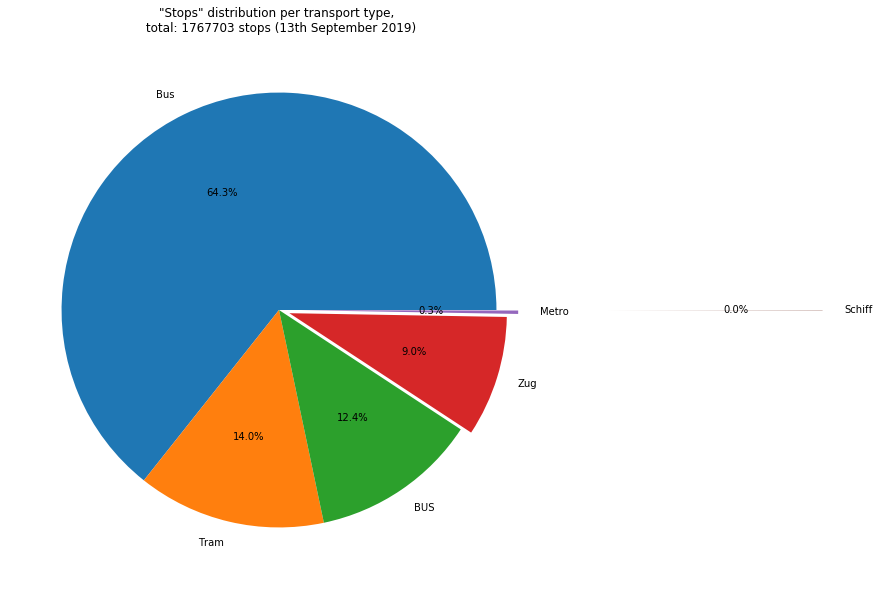

In [9]:
plot_value_counts_pie_chart(data_all['PRODUKT_ID'], '"Stops" distribution per transport type');

In [10]:
# Keep only trains data (Zug is train in german)
data_train = data_all[data_all['PRODUKT_ID']=='Zug']

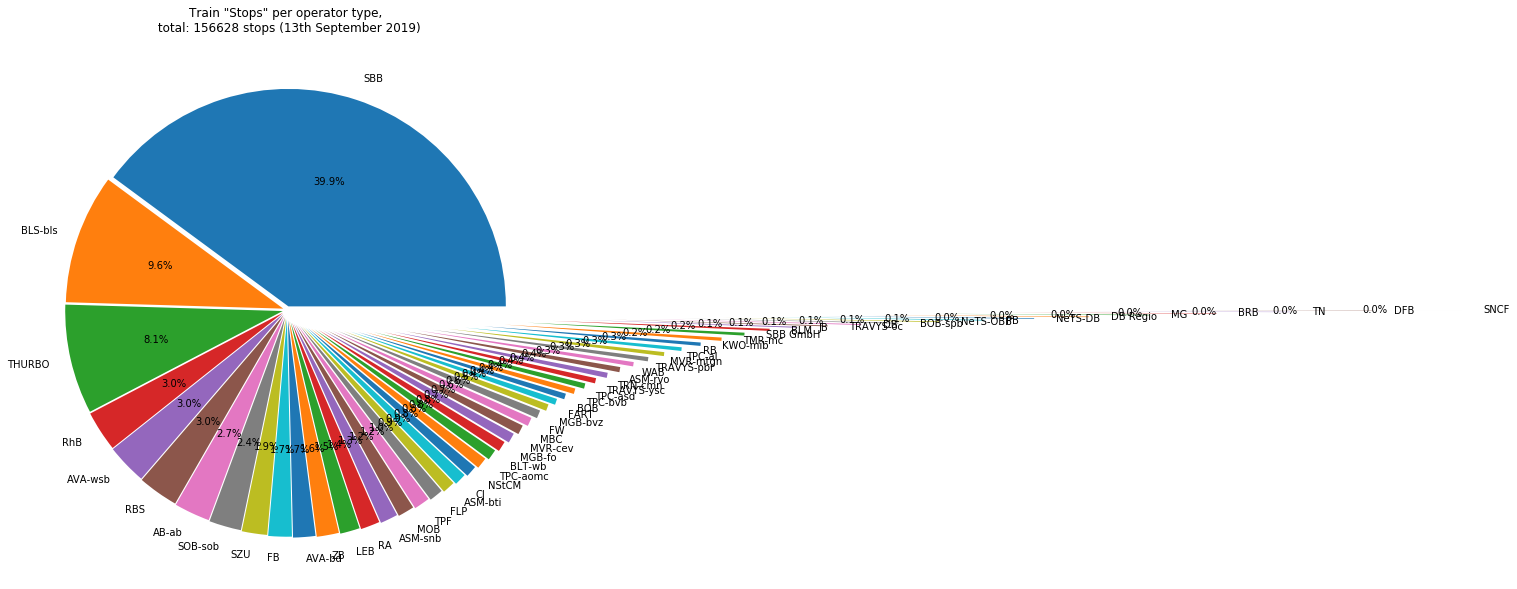

In [11]:
explode = list(np.true_divide(np.logspace(-1.2, 1.2, data_train['BETREIBER_ABK'].value_counts().shape[0]),3.6))
plot_value_counts_pie_chart(data_train['BETREIBER_ABK'], 'Train "Stops" per operator type')

In [12]:
# Keep only trains operated by SBB
data_train_SBB = data_train[data_train['BETREIBER_ABK']=='SBB']

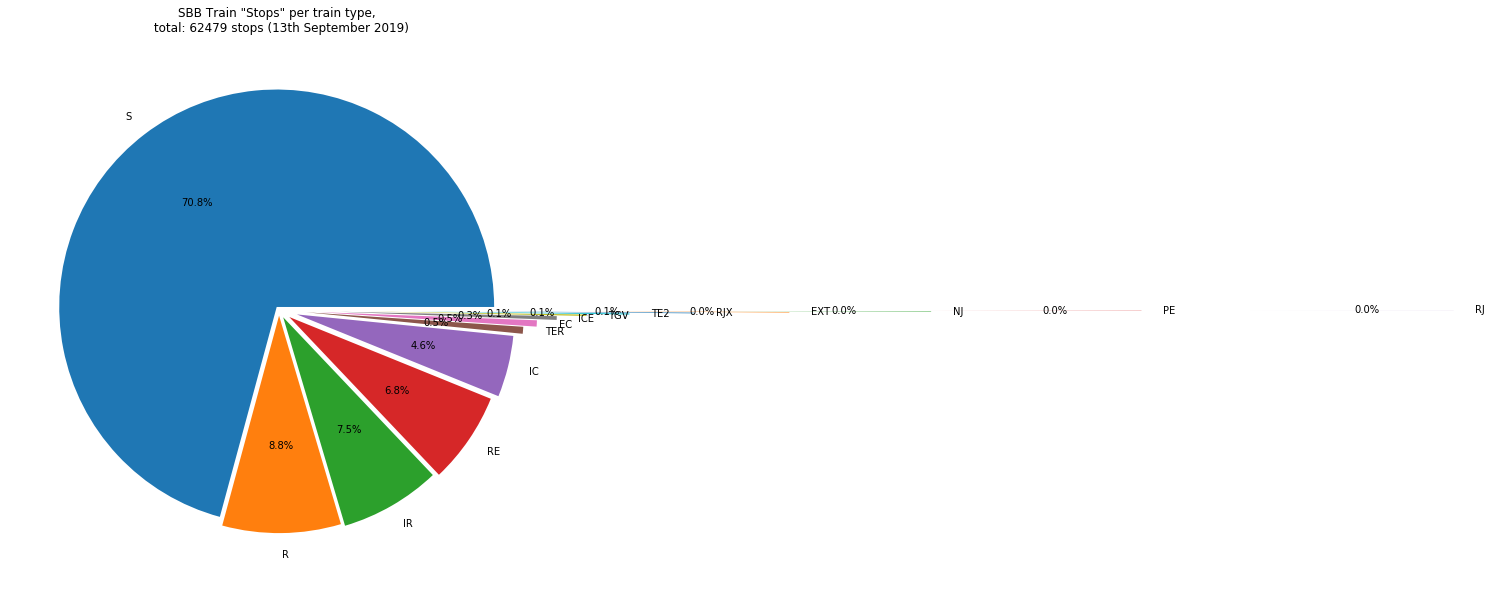

In [13]:
explode = list(np.true_divide(np.logspace(-1.2, 1.2, data_train_SBB['VERKEHRSMITTEL_TEXT'].value_counts().shape[0]),3.6))
plot_value_counts_pie_chart(data_train_SBB['VERKEHRSMITTEL_TEXT'], 'SBB Train "Stops" per train type')

In [14]:
# Keep only lonmg-distance SBB trains IC, RE and IR
data_train_SBB_ld = data_train_SBB[data_train_SBB['VERKEHRSMITTEL_TEXT'].isin(['IC','RE','IR'])]

In [15]:
# Take a look at the data, to understand its size
data_train_SBB_ld.describe(include='object')

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
count,11766,11766,11766,11766,11766,11766,11766,11766,0,11766,11766,10285,10097,11766,10299,10110,11766
unique,1,1546,1,1,1,1,1546,25,0,3,205,1308,9412,2,1305,9390,2
top,13.09.2019,85:11:1836:002,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1836,RE,NaN,IR,Zürich HB,13.09.2019 17:27,13.09.2019 15:45:25,REAL,13.09.2019 21:00,13.09.2019 17:40:44,REAL
freq,11766,20,11766,11766,11766,11766,20,4239,NaN,4680,722,20,4,9808,20,4,9857


In [25]:
data_train_SBB_ld.loc[data_train_SBB_ld['LINIEN_ID']=='1980']

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
26791,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8503000,Zürich HB,NaN,NaN,PROGNOSE,13.09.2019 17:36,13.09.2019 17:37:35,REAL,False
26792,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8503504,Baden,13.09.2019 17:51,13.09.2019 17:51:36,REAL,13.09.2019 17:52,13.09.2019 17:54:57,REAL,False
26793,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500309,Brugg AG,13.09.2019 18:00,13.09.2019 18:01:24,REAL,13.09.2019 18:02,13.09.2019 18:03:54,REAL,False
26794,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500305,Frick,13.09.2019 18:17,13.09.2019 18:18:29,REAL,13.09.2019 18:18,13.09.2019 18:20:58,REAL,False
26795,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500320,Stein-Säckingen,13.09.2019 18:24,13.09.2019 18:25:36,REAL,13.09.2019 18:25,13.09.2019 18:27:03,REAL,False
26796,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500301,Rheinfelden,13.09.2019 18:33,13.09.2019 18:34:32,REAL,13.09.2019 18:34,13.09.2019 18:36:15,REAL,False
26797,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500010,Basel SBB,13.09.2019 18:47,13.09.2019 18:48:20,REAL,NaN,NaN,PROGNOSE,False


## Data modeling

In [32]:
pd.options.mode.chained_assignment = None 
# Create delay at arrival and departure (DELAY_ and DELAY_AB) column - which is what we need for our analysis
data_train_SBB_ld['DELAY_AN'] = pd.to_datetime(
    data_train_SBB_ld['AN_PROGNOSE'],
    format="%d.%m.%Y %H:%M:%S") - pd.to_datetime(
        data_train_SBB_ld['ANKUNFTSZEIT'], format="%d.%m.%Y %H:%M")
data_train_SBB_ld['DELAY_AB'] = pd.to_datetime(
    data_train_SBB_ld['AB_PROGNOSE'],
    format="%d.%m.%Y %H:%M:%S") - pd.to_datetime(
        data_train_SBB_ld['ABFAHRTSZEIT'], format="%d.%m.%Y %H:%M")

In [34]:
# Check what the new columns looks like. We have timedelta, also sometimes negative. 
# This will have to be transformed to seconds in a later stage
data_train_SBB_ld['DELAY_AB'].describe()

count                     10110
mean     0 days 00:02:25.250148
std      0 days 00:03:00.257899
min           -1 days +23:59:42
25%             0 days 00:00:55
50%             0 days 00:01:32
75%             0 days 00:02:46
max             0 days 00:38:07
Name: DELAY_AB, dtype: object

In [41]:
count = 0
for i in np.unique(data_train_SBB_ld['HALTESTELLEN_NAME']):
    print(i)
    count += 1

Aarau
Aarburg-Oftringen
Aigle
Airolo
Allaman
Altdorf
Altstätten SG
Ambrì-Piotta
Amriswil
Arth-Goldau
Baar
Bad Ragaz
Baden
Balerna
Basel Bad Bf
Basel SBB
Bassecourt
Bellinzona
Bern
Bex
Biasca
Biel/Bienne
Bodio TI
Boncourt
Brig
Brittnau-Wikon
Brugg AG
Brunnen
Buchs SG
Buix
Burgdorf
Burier
Bülach
Castione-Arbedo
Cham
Chambrelien
Chiasso
Chur
Clarens
Coppet
Corgémont
Cormoret
Cortébert
Courchavon
Courfaivre
Courgenay
Courtelary
Courtemaîche
Courtételle
Cully
Dagmersellen
Delémont
Dietikon
Düdingen
Ebikon
Emmenbrücke
Erstfeld
Faido
Flamatt
Flawil
Flums
Flüelen
Frauenfeld
Fribourg/Freiburg
Frick
Frutigen
Gelterkinden
Genève
Genève-Aéroport
Gisikon-Root
Giubiasco
Gland
Glanzenberg
Glovelier
Gossau SG
Grandgourt
Grenchen Nord
Grenchen Süd
Göschenen
Gümligen
Heerbrugg
Herzogenbuchsee
Immensee
Interlaken Ost
Interlaken West
Killwangen-Spreitenbach
Kreuzlingen
La Chaux-de-Fonds
La Tour-de-Peilz
Lachen
Lamone-Cadempino
Landquart
Langenthal
Laufen
Lausanne
Lavorgo
Le Crêt-du-Locle
Le Locle
Leissige

In [40]:
count

205

In [38]:
len(np.unique(data_train_SBB_ld['HALTESTELLEN_NAME']))

205